In [1]:
# 7.1 描述性统计分析
myvars <- c("mpg", "hp", "wt")
head(mtcars[myvars]) 

,mpg,hp,wt
,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,110,2.620
Mazda RX4 Wag,21.0,110,2.875
Datsun 710,22.8,93,2.320
Hornet 4 Drive,21.4,110,3.215
Hornet Sportabout,18.7,175,3.440
Valiant,18.1,105,3.460


In [2]:
# 7.1.1 方法云集
# 7-1 通过summary()计算描述性统计量
myvars <- c("mpg", "hp", "wt")
summary(mtcars[myvars]) 

      mpg              hp              wt       
 Min.   :10.40   Min.   : 52.0   Min.   :1.513  
 1st Qu.:15.43   1st Qu.: 96.5   1st Qu.:2.581  
 Median :19.20   Median :123.0   Median :3.325  
 Mean   :20.09   Mean   :146.7   Mean   :3.217  
 3rd Qu.:22.80   3rd Qu.:180.0   3rd Qu.:3.610  
 Max.   :33.90   Max.   :335.0   Max.   :5.424  

In [3]:
# 7-2 通过sapply()计算描述性统计量
mystats <- function(x, na.omit=FALSE){
 if (na.omit)
 x <- x[!is.na(x)]
 m <- mean(x)
 n <- length(x)
 s <- sd(x)
 skew <- sum((x-m)^3/s^3)/n
 kurt <- sum((x-m)^4/s^4)/n - 3
 return(c(n=n, mean=m, stdev=s, skew=skew, kurtosis=kurt))
 }

myvars <- c("mpg", "hp", "wt")
sapply(mtcars[myvars], mystats)

,mpg,hp,wt
n,32.000000,32.0000000,32.00000000
mean,20.090625,146.6875000,3.21725000
stdev,6.026948,68.5628685,0.97845744
skew,0.610655,0.7260237,0.42314646
kurtosis,-0.372766,-0.1355511,-0.02271075


In [4]:
# 7.1.2 更多方法
# 7-3 通过Hmisc包中的describe()函数计算描述性统计量
library(Hmisc)
myvars <- c("mpg", "hp", "wt")
describe(mtcars[myvars]) 

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




mtcars[myvars] 

 3  Variables      32  Observations
--------------------------------------------------------------------------------
mpg 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      32        0       25    0.999    20.09    6.796    12.00    14.34 
     .25      .50      .75      .90      .95 
   15.43    19.20    22.80    30.09    31.30 

lowest : 10.4 13.3 14.3 14.7 15.0, highest: 26.0 27.3 30.4 32.4 33.9
--------------------------------------------------------------------------------
hp 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      32        0       22    0.997    146.7    77.04    63.65    66.00 
     .25      .50      .75      .90      .95 
   96.50   123.00   180.00   243.50   253.55 

lowest :  52  62  65  66  91, highest: 215 230 245 264 335
--------------------------------------------------------------------------------
wt 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      32    

In [6]:
# 7-4 通过pastecs包中的stat.desc()函数计算描述性统计量
# install.packages("pastecs")
library(pastecs)
myvars <- c("mpg", "hp", "wt")
stat.desc(mtcars[myvars])

,mpg,hp,wt
,<dbl>,<dbl>,<dbl>
nbr.val,32.0000000,32.0000000,32.0000000
nbr.null,0.0000000,0.0000000,0.0000000
nbr.na,0.0000000,0.0000000,0.0000000
min,10.4000000,52.0000000,1.5130000
max,33.9000000,335.0000000,5.4240000
range,23.5000000,283.0000000,3.9110000
sum,642.9000000,4694.0000000,102.9520000
median,19.2000000,123.0000000,3.3250000
mean,20.0906250,146.6875000,3.2172500


In [8]:
# describe()的函数，它可以计算非缺失值的数量、平均数、标准差、中位数、截尾均值、绝对中位差、最小值、最大值、值域、偏度、峰度和平均
# 值的标准误。
# 7-5 通过psych包中的describe()计算描述性统计量
library(psych)
myvars <- c("mpg", "hp", "wt")
describe(mtcars[myvars]) 

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,32,20.09062,6.0269481,19.200,19.696154,5.4114900,10.400,33.900,23.500,0.6106550,-0.37276603,1.0654240
hp,2,32,146.68750,68.5628685,123.000,141.192308,77.0952000,52.000,335.000,283.000,0.7260237,-0.13555112,12.1203173
wt,3,32,3.21725,0.9784574,3.325,3.152692,0.7672455,1.513,5.424,3.911,0.4231465,-0.02271075,0.1729685


In [10]:
# 7.1.3 分组计算描述性统计量
# 7-6 使用aggregate()分组获取描述性统计量
myvars <- c("mpg", "hp", "wt") 
aggregate(mtcars[myvars], by=list(am=mtcars$am), mean)
aggregate(mtcars[myvars], by=list(am=mtcars$am), sd)

am,mpg,hp,wt
<dbl>,<dbl>,<dbl>,<dbl>
0,17.14737,160.2632,3.768895
1,24.39231,126.8462,2.411000


am,mpg,hp,wt
<dbl>,<dbl>,<dbl>,<dbl>
0,3.833966,53.90820,0.7774001
1,6.166504,84.06232,0.6169816


In [11]:
# 7-7 使用by()分组计算描述性统计量
dstats <- function(x)sapply(x, mystats)
myvars <- c("mpg", "hp", "wt")
by(mtcars[myvars], mtcars$am, dstats)

mtcars$am: 0
                 mpg           hp         wt
n        19.00000000  19.00000000 19.0000000
mean     17.14736842 160.26315789  3.7688947
stdev     3.83396639  53.90819573  0.7774001
skew      0.01395038  -0.01422519  0.9759294
kurtosis -0.80317826  -1.20969733  0.1415676
------------------------------------------------------------ 
mtcars$am: 1
                 mpg          hp         wt
n        13.00000000  13.0000000 13.0000000
mean     24.39230769 126.8461538  2.4110000
stdev     6.16650381  84.0623243  0.6169816
skew      0.05256118   1.3598859  0.2103128
kurtosis -1.45535200   0.5634635 -1.1737358

In [14]:
# 7.1.4 分组计算的扩展
# 7-8 使用doBy包中的summaryBy()分组计算概述统计量
# install.packages("doBy")
library(doBy)
summaryBy(mpg+hp+wt~am, data=mtcars, FUN=mystats)

,am,mpg.n,mpg.mean,mpg.stdev,mpg.skew,mpg.kurtosis,hp.n,hp.mean,hp.stdev,hp.skew,hp.kurtosis,wt.n,wt.mean,wt.stdev,wt.skew,wt.kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,19,17.14737,3.833966,0.01395038,-0.8031783,19,160.2632,53.90820,-0.01422519,-1.2096973,19,3.768895,0.7774001,0.9759294,0.1415676
2,1,13,24.39231,6.166504,0.05256118,-1.4553520,13,126.8462,84.06232,1.35988586,0.5634635,13,2.411000,0.6169816,0.2103128,-1.1737358


In [15]:
# 7-9 使用psych包中的describeBy()分组计算概述统计量
library(psych)
myvars <- c("mpg", "hp", "wt")
describeBy(mtcars[myvars], list(am=mtcars$am))


 Descriptive statistics by group 
am: 0
    vars  n   mean    sd median trimmed   mad   min    max  range  skew
mpg    1 19  17.15  3.83  17.30   17.12  3.11 10.40  24.40  14.00  0.01
hp     2 19 160.26 53.91 175.00  161.06 77.10 62.00 245.00 183.00 -0.01
wt     3 19   3.77  0.78   3.52    3.75  0.45  2.46   5.42   2.96  0.98
    kurtosis    se
mpg    -0.80  0.88
hp     -1.21 12.37
wt      0.14  0.18
------------------------------------------------------------ 
am: 1
    vars  n   mean    sd median trimmed   mad   min    max  range skew kurtosis
mpg    1 13  24.39  6.17  22.80   24.38  6.67 15.00  33.90  18.90 0.05    -1.46
hp     2 13 126.85 84.06 109.00  114.73 63.75 52.00 335.00 283.00 1.36     0.56
wt     3 13   2.41  0.62   2.32    2.39  0.68  1.51   3.57   2.06 0.21    -1.17
       se
mpg  1.71
hp  23.31
wt   0.17

In [25]:
str(myvars)
head(myvars)


 chr [1:3] "mpg" "hp" "wt"


[1] "mpg" "hp"  "wt"

In [30]:
# 7.2 频数表和列联表
# 本节中的数据来自vcd包中的Arthritis数据集。这份数据来自Kock & Edward （1988），表
# 示了一项风湿性关节炎新疗法的双盲临床实验的结果。前几个观测是这样的：
library(vcd)
head(Arthritis)

,ID,Treatment,Sex,Age,Improved
,<int>,<fct>,<fct>,<int>,<ord>
1,57,Treated,Male,27,Some
2,46,Treated,Male,29,None
3,77,Treated,Male,30,None
4,17,Treated,Male,32,Marked
5,36,Treated,Male,46,Marked
6,23,Treated,Male,58,Marked


In [31]:
str(Arthritis)

'data.frame':	84 obs. of  5 variables:
 $ ID       : int  57 46 77 17 36 23 75 39 33 55 ...
 $ Treatment: Factor w/ 2 levels "Placebo","Treated": 2 2 2 2 2 2 2 2 2 2 ...
 $ Sex      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Age      : int  27 29 30 32 46 58 59 59 63 63 ...
 $ Improved : Ord.factor w/ 3 levels "None"<"Some"<..: 2 1 1 3 3 3 1 3 1 1 ...


In [33]:
dim(Arthritis)

[1] 84  5

In [34]:
# 7.2.1 生成频数表

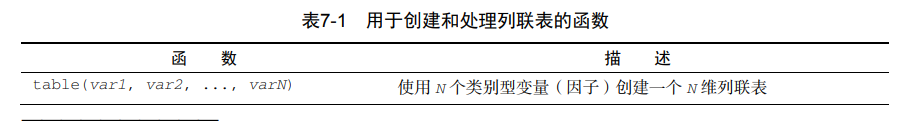

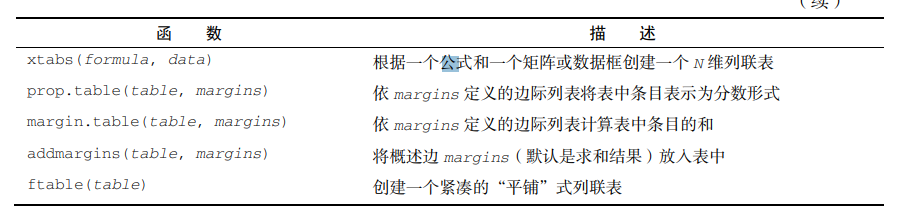

In [35]:
# 1. 一维列联表
# 使用table()函数生成简单的频数统计表。示例如下:
mytable <- with(Arthritis, table(Improved))
mytable

Improved
  None   Some Marked 
    42     14     28 

In [36]:
# 可以用prop.table()将这些频数转化为比例值：
prop.table(mytable)

Improved
     None      Some    Marked 
0.5000000 0.1666667 0.3333333 

In [37]:
# 使用prop.table()*100转化为百分比：
prop.table(mytable)*100

Improved
    None     Some   Marked 
50.00000 16.66667 33.33333 

In [38]:
# 2. 二维列联表
# 对于二维列联表，table()函数的使用格式为：其中的A是行变量，B是列变量。
# xtabs()函数还可使用公式风格的输入创建列联表，格式为：
# mytable <- xtabs(~ A + B, data=mydata)  其中的mydata是一个矩阵或数据框
# 要进行交叉分类的变量应出现在公式的右侧（即~符号的右方），以+作为分隔符
mytable <- xtabs(~ Treatment+Improved, data=Arthritis)
mytable 

         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

In [39]:
# 以使用margin.table()和prop.table()函数分别生成边际频数和比例。行和与行比例可以这样计算:
margin.table(mytable, 1)# 行和

Treatment
Placebo Treated 
     43      41 

In [40]:
prop.table(mytable, 1)# 行比例
# 下标1指代table()语句中的第一个变量。观察表格可以发现，与接受安慰剂的个体中有显
# 著改善的16%相比，接受治疗的个体中的51%的个体病情有了显著的改善。

         Improved
Treatment      None      Some    Marked
  Placebo 0.6744186 0.1627907 0.1627907
  Treated 0.3170732 0.1707317 0.5121951

In [41]:
margin.table(mytable, 2)

Improved
  None   Some Marked 
    42     14     28 

In [42]:
 prop.table(mytable, 2)# 这里的下标2指代按照列进行求边际

         Improved
Treatment      None      Some    Marked
  Placebo 0.6904762 0.5000000 0.2500000
  Treated 0.3095238 0.5000000 0.7500000

In [44]:
# 以使用addmargins()函数为这些表格添加边际和
addmargins(mytable)

,None,Some,Marked,Sum
Placebo,29,7,7,43
Treated,13,7,21,41
Sum,42,14,28,84


In [45]:
addmargins(prop.table(mytable))

,None,Some,Marked,Sum
Placebo,0.3452381,0.08333333,0.08333333,0.5119048
Treated,0.1547619,0.08333333,0.25000000,0.4880952
Sum,0.5000000,0.16666667,0.33333333,1.0000000


In [46]:
# 使用addmargins()时，默认行为是为表中所有的变量创建边际和
 addmargins(prop.table(mytable, 1), 2) # 仅添加了各行的和。

,None,Some,Marked,Sum
Placebo,0.6744186,0.1627907,0.1627907,1
Treated,0.3170732,0.1707317,0.5121951,1


In [47]:
 addmargins(prop.table(mytable, 2), 1) # 添加了各列的和

,None,Some,Marked
Placebo,0.6904762,0.5,0.25
Treated,0.3095238,0.5,0.75
Sum,1.0000000,1.0,1.00


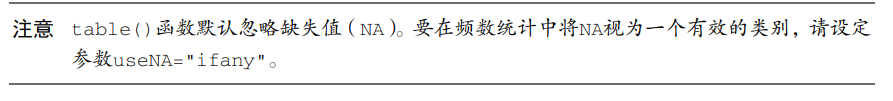

In [51]:
# 7-10 使用CrossTable生成二维列联表
# install.packages("gmodels")
library(gmodels)
CrossTable(Arthritis$Treatment, Arthritis$Improved)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  84 

 
                    | Arthritis$Improved 
Arthritis$Treatment |      None |      Some |    Marked | Row Total | 
--------------------|-----------|-----------|-----------|-----------|
            Placebo |        29 |         7 |         7 |        43 | 
                    |     2.616 |     0.004 |     3.752 |           | 
                    |     0.674 |     0.163 |     0.163 |     0.512 | 
                    |     0.690 |     0.500 |     0.250 |           | 
                    |     0.345 |     0.083 |     0.083 |           | 
--------------------|-----------|-----------|-----------|-----------|
            Treated |        13 |         7 |        21 |        41 | 
                    |     2.744 |     0.004 |     3.935 |        

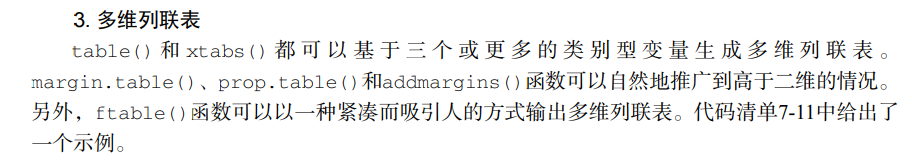

In [52]:
mytable <- xtabs(~ Treatment+Sex+Improved, data=Arthritis)
mytable # 各单元格的频数

, , Improved = None

         Sex
Treatment Female Male
  Placebo     19   10
  Treated      6    7

, , Improved = Some

         Sex
Treatment Female Male
  Placebo      7    0
  Treated      5    2

, , Improved = Marked

         Sex
Treatment Female Male
  Placebo      6    1
  Treated     16    5


In [53]:
ftable(mytable)

                 Improved None Some Marked
Treatment Sex                             
Placebo   Female            19    7      6
          Male              10    0      1
Treated   Female             6    5     16
          Male               7    2      5

In [54]:
margin.table(mytable, 1) # 边际频数

Treatment
Placebo Treated 
     43      41 

In [55]:
margin.table(mytable, 2) # 

Sex
Female   Male 
    59     25 

In [56]:
margin.table(mytable, 3)

Improved
  None   Some Marked 
    42     14     28 

In [57]:
margin.table(mytable, c(1, 3))# 治疗情况（Treatment）× 改善情况（Improved）的边际频数

         Improved
Treatment None Some Marked
  Placebo   29    7      7
  Treated   13    7     21

In [58]:
 ftable(prop.table(mytable, c(1, 2)))# 治疗情况（Treatment）× 性别（Sex）的各类改善情况比例

                 Improved       None       Some     Marked
Treatment Sex                                             
Placebo   Female          0.59375000 0.21875000 0.18750000
          Male            0.90909091 0.00000000 0.09090909
Treated   Female          0.22222222 0.18518519 0.59259259
          Male            0.50000000 0.14285714 0.35714286

In [60]:
ftable(addmargins(prop.table(mytable, c(1, 2)), 3))

                 Improved       None       Some     Marked        Sum
Treatment Sex                                                        
Placebo   Female          0.59375000 0.21875000 0.18750000 1.00000000
          Male            0.90909091 0.00000000 0.09090909 1.00000000
Treated   Female          0.22222222 0.18518519 0.59259259 1.00000000
          Male            0.50000000 0.14285714 0.35714286 1.00000000

In [61]:
# Treatment需要通过下标1来引用，Sex通过下标2来引用，Improve通过下标3来引用。

In [62]:
ftable(addmargins(prop.table(mytable, c(1, 2)), 3)) * 100

                 Improved       None       Some     Marked        Sum
Treatment Sex                                                        
Placebo   Female           59.375000  21.875000  18.750000 100.000000
          Male             90.909091   0.000000   9.090909 100.000000
Treated   Female           22.222222  18.518519  59.259259 100.000000
          Male             50.000000  14.285714  35.714286 100.000000

In [63]:
# 7.2.2 独立性检验
# 的三种检验分别为卡方独立性检验、Fisher精确检验和Cochran-Mantel-Haenszel检验。
# 1.卡方独立性检验
# 7-12 卡方独立性检验
library(vcd)
mytable <- xtabs(~Treatment+Improved, data=Arthritis)
chisq.test(mytable) # 治疗情况和改善情况不独立


	Pearson's Chi-squared test

data:  mytable
X-squared = 13.055, df = 2, p-value = 0.001463


In [64]:
mytable <- xtabs(~Improved+Sex, data=Arthritis)
chisq.test(mytable)# 性别和改善情况独立

Warning message in chisq.test(mytable):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  mytable
X-squared = 4.8407, df = 2, p-value = 0.08889


In [65]:
# 2. Fisher精确检验
mytable <- xtabs(~Treatment+Improved, data=Arthritis)
fisher.test(mytable)



	Fisher's Exact Test for Count Data

data:  mytable
p-value = 0.001393
alternative hypothesis: two.sided


In [66]:
# 3. Cochran-Mantel-Haenszel检验
mytable <- xtabs(~Treatment+Improved+Sex, data=Arthritis)
mantelhaen.test(mytable) 


	Cochran-Mantel-Haenszel test

data:  mytable
Cochran-Mantel-Haenszel M^2 = 14.632, df = 2, p-value = 0.0006647


In [ ]:
# 结果表明，患者接受的治疗与得到的改善在性别的每一水平下并不独立（分性别来看，用药
# 治疗的患者较接受安慰剂的患者有了更多的改善）。